In [1]:
import json
import folium
from folium.plugins import MarkerCluster
import mapclassify as mc
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from matplotlib import colors
import seaborn as sbn
%matplotlib inline

In [2]:
gdf2 = gpd.read_file('../data/GraniceOsiedli/GraniceOsiedli.shp')
gdf2 = gdf2.to_crs("EPSG:4326")

In [3]:
DsWrocWybConName = 'DsWrocWybCon'
DsWrocAlWisnName = 'DsWrocAlWisn'
DsWrocBartniName = 'DsWrocBartni'

DsWrocWybConPoint = Point(17.029250, 51.129378)
DsWrocAlWisnPoint = Point(17.012689, 51.086225)
DsWrocBartniPoint = Point(17.141125, 51.115933)

In [4]:
def calculate_distance(pnt1, pnt2):
    points_df = gpd.GeoDataFrame({'geometry': [pnt1, pnt2]}, crs='EPSG:4326')
    points_df = points_df.to_crs('EPSG:5234')
    points_df2 = points_df.shift() #We shift the dataframe by 1 to align pnt1 with pnt2
    return points_df.distance(points_df2)[1]

In [5]:
idx = 0
stations = []
names = [DsWrocWybConName, DsWrocAlWisnName, DsWrocBartniName]
for _, row in gdf2.iterrows():
    
    pnt1 = row.geometry.centroid
    pnt2 = DsWrocWybConPoint
    min_distance = calculate_distance(pnt1, pnt2)
    name = DsWrocWybConName
    
    pnt2 = DsWrocAlWisnPoint
    distance2 = calculate_distance(pnt1, pnt2)
    if distance2 < min_distance:
        min_distance = distance2
        name = DsWrocAlWisnName
    
    pnt2 = DsWrocBartniPoint
    distance3 = calculate_distance(pnt1, pnt2)
    if distance3 < min_distance:
        min_distance = distance3
        name = DsWrocBartniName
    
    stations.append(name)

In [6]:
gdf2['station'] = stations

<AxesSubplot:>

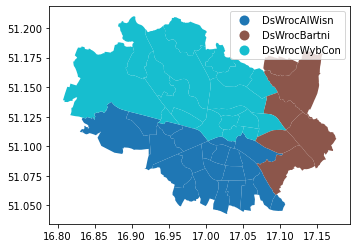

In [7]:
gdf2.plot(column='station', legend=True)

In [8]:
gdf2

,OBJECTID,NROSIEDLA,NAZWAOSIED,DATA,SHAPE_AREA,SHAPE_LEN,geometry,station
0,340,21,Krzyki - Partynice,2016-01-21,5.254965e+06,9994.583078,"POLYGON ((17.00274 51.07769, 17.00307 51.07736...",DsWrocAlWisn
1,341,24,Gądów - Popowice Płd.,2016-01-21,3.134569e+06,7588.647951,"POLYGON ((16.99623 51.12009, 16.99606 51.11987...",DsWrocWybCon
2,348,42,Sołtysowice,2016-01-21,4.547041e+06,9003.773230,"POLYGON ((17.07442 51.16517, 17.07537 51.16478...",DsWrocWybCon
3,349,18,Bieńkowice,2016-01-21,1.433161e+06,4760.314072,"POLYGON ((17.10486 51.04816, 17.10339 51.04529...",DsWrocAlWisn
4,351,32,Żerniki,2016-01-21,3.908726e+06,9132.805421,"POLYGON ((16.93916 51.12235, 16.93915 51.12233...",DsWrocAlWisn
5,352,29,Muchobór Wielki,2016-01-21,6.879545e+06,13228.130080,"POLYGON ((16.94687 51.10972, 16.94690 51.10972...",DsWrocAlWisn
6,353,10,Przedmieście Oławskie,2016-01-21,5.966906e+06,12448.378083,"POLYGON ((17.04922 51.11159, 17.04926 51.11158...",DsWrocAlWisn
7,354,14,Gaj,2016-01-21,2.588012e+06,6781.047181,"POLYGON ((17.03269 51.08320, 17.03550 51.08313...",DsWrocAlWisn
8,355,48,Wojszyce,2016-01-21,3.270306e+06,8956.676852,"POLYGON ((17.04803 51.07111, 17.04855 51.07111...",DsWrocAlWisn
9,356,15,Borek,2016-01-21,2.763975e+06,6899.239904,"POLYGON ((17.00612 51.08806, 17.00904 51.08720...",DsWrocAlWisn


In [9]:
filename = "../data/piece.csv"
df = pd.read_csv(filename)  
gdf_furnace = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

In [10]:
counts = []

for _, row in gdf2.iterrows():
    count = 0

    for _, furnace in gdf_furnace.iterrows():
        hit = row.geometry.contains(furnace.geometry)
        if hit == True:
            count += furnace['all']
    counts.append(count)


gdf2['furnace'] = counts

<AxesSubplot:>

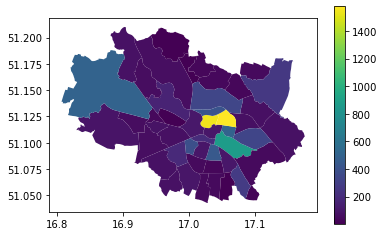

In [11]:
gdf2.plot(column='furnace', legend=True)

In [12]:
gdf2

,OBJECTID,NROSIEDLA,NAZWAOSIED,DATA,SHAPE_AREA,SHAPE_LEN,geometry,station,furnace
0,340,21,Krzyki - Partynice,2016-01-21,5.254965e+06,9994.583078,"POLYGON ((17.00274 51.07769, 17.00307 51.07736...",DsWrocAlWisn,92
1,341,24,Gądów - Popowice Płd.,2016-01-21,3.134569e+06,7588.647951,"POLYGON ((16.99623 51.12009, 16.99606 51.11987...",DsWrocWybCon,3
2,348,42,Sołtysowice,2016-01-21,4.547041e+06,9003.773230,"POLYGON ((17.07442 51.16517, 17.07537 51.16478...",DsWrocWybCon,29
3,349,18,Bieńkowice,2016-01-21,1.433161e+06,4760.314072,"POLYGON ((17.10486 51.04816, 17.10339 51.04529...",DsWrocAlWisn,16
4,351,32,Żerniki,2016-01-21,3.908726e+06,9132.805421,"POLYGON ((16.93916 51.12235, 16.93915 51.12233...",DsWrocAlWisn,56
5,352,29,Muchobór Wielki,2016-01-21,6.879545e+06,13228.130080,"POLYGON ((16.94687 51.10972, 16.94690 51.10972...",DsWrocAlWisn,64
6,353,10,Przedmieście Oławskie,2016-01-21,5.966906e+06,12448.378083,"POLYGON ((17.04922 51.11159, 17.04926 51.11158...",DsWrocAlWisn,866
7,354,14,Gaj,2016-01-21,2.588012e+06,6781.047181,"POLYGON ((17.03269 51.08320, 17.03550 51.08313...",DsWrocAlWisn,31
8,355,48,Wojszyce,2016-01-21,3.270306e+06,8956.676852,"POLYGON ((17.04803 51.07111, 17.04855 51.07111...",DsWrocAlWisn,42
9,356,15,Borek,2016-01-21,2.763975e+06,6899.239904,"POLYGON ((17.00612 51.08806, 17.00904 51.08720...",DsWrocAlWisn,44


In [13]:
district_population = [19.9, 25.8, 3.7, 0.5, 3.9, 12.2, 22.3, 20.3, 5.9, 13.0, 6.6, 6.5, 8.4, 6.8, 4.5, 14.5, 24.8, 5.6, 16.4, 21.1, 2.1, 5.9, 5.9, 2.2, 0.7, 1.8, 14.6, 2.3, 10.3, 4.7, 13.8, 5.0, 7.0, 3.0, 6.3, 29.6, 33.6, 33.5, 28.1, 28.2, 24.8, 20.9, 10.1, 34.6, 6.4, 22.1, 7.4, 1.6]

In [14]:
gdf2['district_population'] = district_population

<AxesSubplot:>

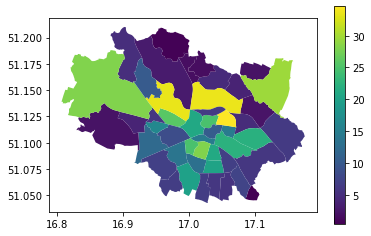

In [15]:
gdf2.plot(column='district_population', legend=True)

In [16]:
def calculate_furnace_factor(gdf):
    factors = []
    for _, row in gdf2.iterrows():
        factor = row.furnace / row.district_population
        factors.append(factor)
    return factors

In [17]:
gdf2['furnace_factor'] = calculate_furnace_factor(gdf2)

<AxesSubplot:>

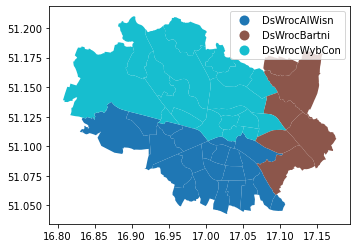

In [18]:
gdf2.plot(column='station', legend=True)

<AxesSubplot:>

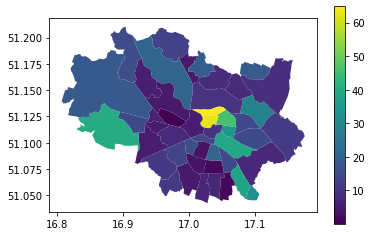

In [19]:
gdf2.plot(column='furnace_factor', legend=True)

<AxesSubplot:>

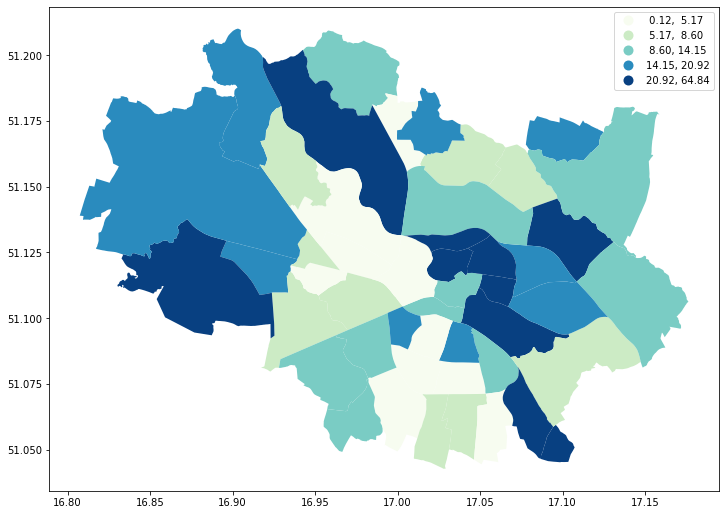

In [20]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
gdf2.plot(column='furnace_factor', scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax)

In [23]:
df = gdf2
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'
y = df['furnace_factor']
ylag = lps.weights.lag_spatial(wq, y)
ylagq5 = mc.Quantiles(ylag, k=5)

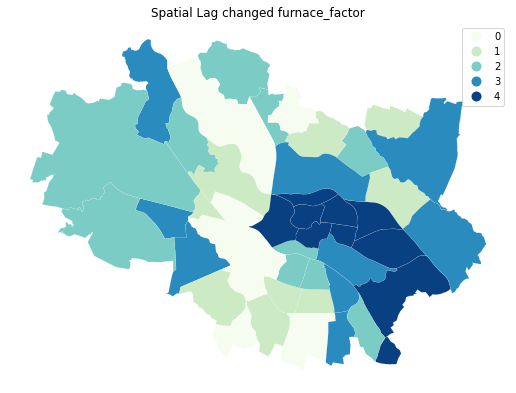

In [24]:
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag changed furnace_factor")

plt.show()

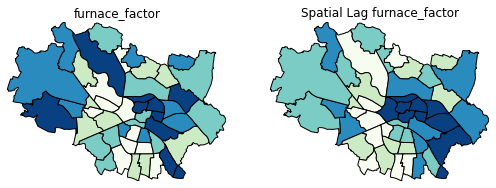

In [25]:
df['lag_median_furnace_factor'] = ylag
f,ax = plt.subplots(1,2,figsize=(2.16*4,4))
df.plot(column='furnace_factor', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("furnace_factor")
df.plot(column='lag_median_furnace_factor', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag furnace_factor")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

Widzimy występujące skupienie dla czwartego kwintyla w centrum miasta ciągnący się do południowo-wschodnich granic miasta. Sugeruje nam to że nie mamy doczynienia z losowym rozkładem wymienionych piecy do liczby zamieszkujących osób daną dzielnicę.

# Globalna autokorelacja przestrzenna

In [26]:
y.median()

11.175824175824175

In [27]:
yb = y > y.median()
sum(yb)

24

In [28]:
yb = y > y.median()
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb]
df['yb'] = yb

<AxesSubplot:>

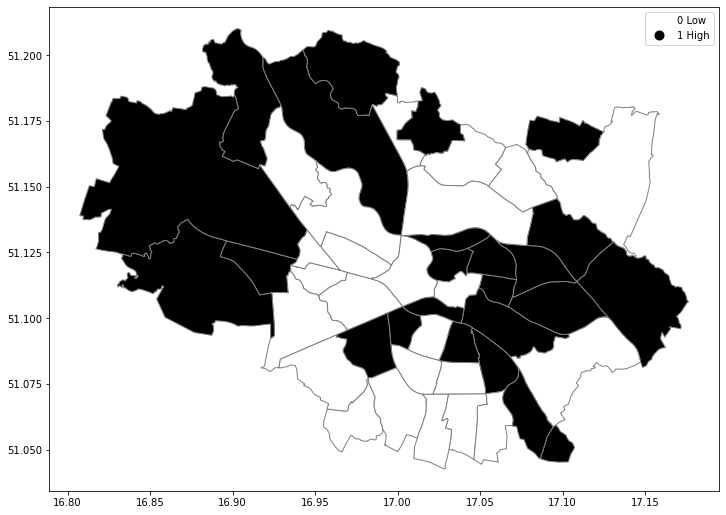

In [29]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

Dla 24 osiedli liczba wymienionych piecy jest powyżej mediany a drugie 24 poniżej . Zauważamy, że większość z dzielnic w której liczba wymienionych piecy jest większa od mediany grupuje się w dwóch grupach od zachodniej granicy miasta oraz w centrum z rozciągnięciem się pod wschodnią granicę miasta

# Ciągły przypadek

In [33]:
wq.transform = 'r'
y = df['furnace_factor']

In [34]:
np.random.seed(12345)
mi = esda.moran.Moran(y, wq)
mi.I

0.26269206088806824

In [35]:
mi.p_sim

0.003

Text(0.5, 0, "Moran's I")

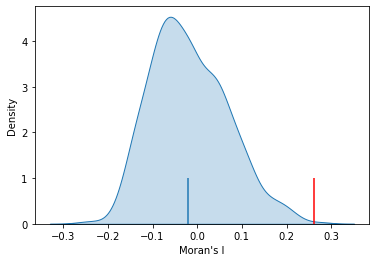

In [36]:
import seaborn as sbn
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

# Autokorelacja lokalna: punkty gorące, punkty zimne i odstające przestrzennie

In [60]:
np.random.seed(12345)
wq.transform = 'r'
lag_furnace = lps.weights.lag_spatial(wq, df['furnace_factor'])

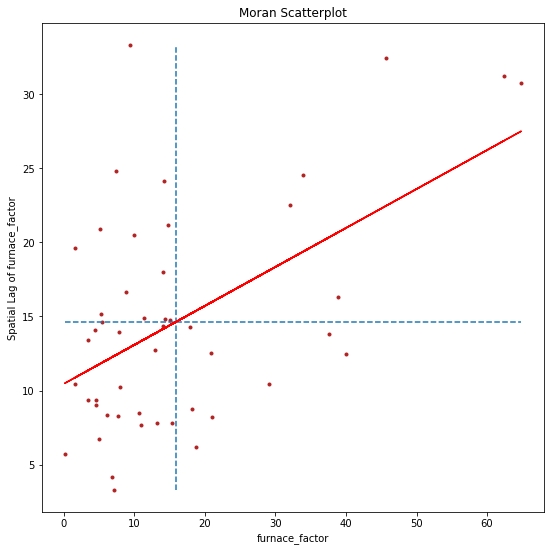

In [63]:
furnace = df['furnace_factor']
b, a = np.polyfit(furnace, lag_furnace, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(furnace, lag_furnace, '.', color='firebrick')

 # dashed vert at mean of the furnace
plt.vlines(furnace.mean(), lag_furnace.min(), lag_furnace.max(), linestyle='--')
 # dashed horizontal at mean of lagged furnace
plt.hlines(lag_furnace.mean(), furnace.min(), furnace.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(furnace, a + b*furnace, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of furnace_factor')
plt.xlabel('furnace_factor')
plt.show()

In [64]:
li = esda.moran.Moran_Local(y, wq)
li.q

array([3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 3, 1, 1, 2, 3, 4, 4, 3,
       2, 4, 3, 3, 3, 4, 2, 2, 3, 3, 3, 4, 3, 2, 2, 3, 4, 3, 3, 2, 3, 1,
       1, 2, 4, 4])

In [65]:
len(li.q)

48

In [66]:
li.p_sim

array([0.118, 0.013, 0.447, 0.205, 0.487, 0.478, 0.38 , 0.203, 0.006,
       0.099, 0.009, 0.233, 0.057, 0.341, 0.246, 0.096, 0.024, 0.28 ,
       0.04 , 0.318, 0.468, 0.109, 0.081, 0.407, 0.476, 0.431, 0.421,
       0.246, 0.008, 0.084, 0.058, 0.46 , 0.158, 0.055, 0.488, 0.404,
       0.145, 0.086, 0.424, 0.436, 0.049, 0.139, 0.499, 0.006, 0.023,
       0.192, 0.494, 0.144])

In [67]:
sig = li.p_sim < 0.05
hotspot = sig * li.q==1
coldspot = sig * li.q==3
doughnut = sig * li.q==2
diamond = sig * li.q==4

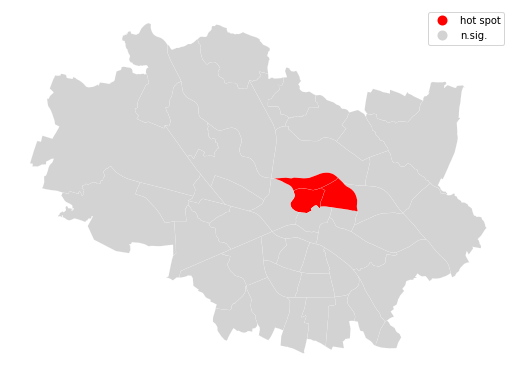

In [68]:
spots = ['n.sig.', 'hot spot']
labels = [spots[i] for i in hotspot*1]
hmap = colors.ListedColormap(['red', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

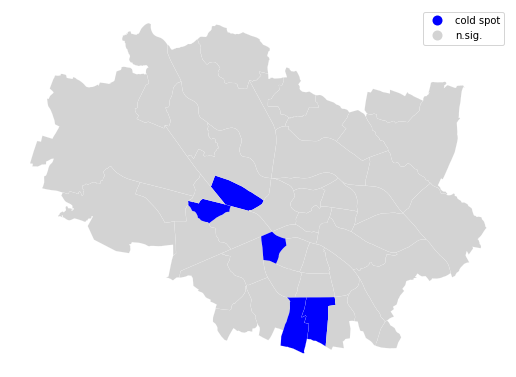

In [69]:
spots = ['n.sig.', 'cold spot']
labels = [spots[i] for i in coldspot*1]
hmap = colors.ListedColormap(['blue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

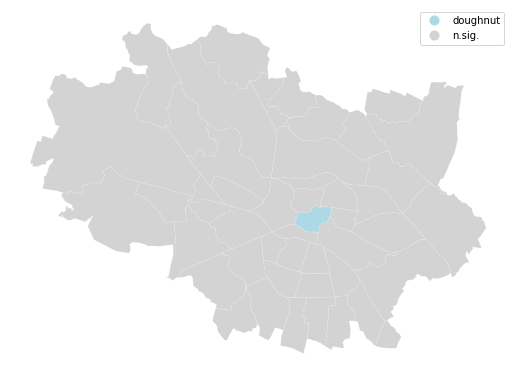

In [70]:
spots = ['n.sig.', 'doughnut']
labels = [spots[i] for i in doughnut*1]
hmap = colors.ListedColormap(['lightblue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

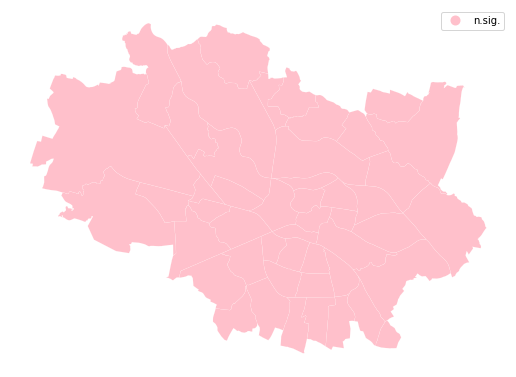

In [71]:
spots = ['n.sig.', 'diamond']
labels = [spots[i] for i in diamond*1]
hmap = colors.ListedColormap(['pink', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [76]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond

In [84]:
spots

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 4,
 3]

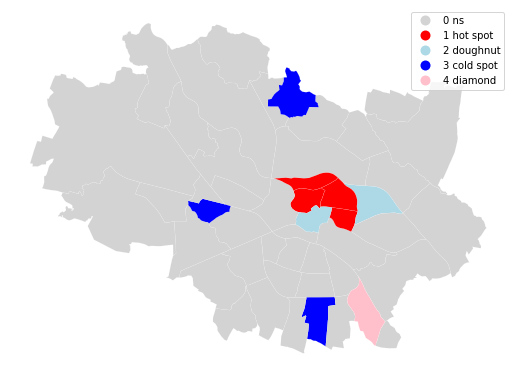

In [78]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

Wyróżniliśmy 4 typy lokalnego powiązania przestrzennego odzwierciedlonego w kwadrantach wykresu punktowego Morana. Zauważamy że gorącymi punktami są dzielnice zlokalizowane w centrum miasta tj: Plac Grunwaldzki, Nadodrze, Ołbin oraz Kleczków. Lokacje ze znaczącą, ale ujemną, lokalną autokorelacją to albo „pączek”, gdzie niska wartość sąsiaduje z lokalizacjami o wysokim współczynniku wymienionych piecy do ludności, albo „nieoszlifowane diamenty”, gdzie wysoka wartość jest otoczona niskimi wartościami. Patrząc na wcześniejsze analizy pamiętamy że mają one bardzo duży współczynnik wymienionych pieców jak i policzony przez nas współczynnik wymienionych piecy do liczby ludności. Sugeruje nam to że w tych oraz sąsiadujących osiedlach tj Stare Miasto oraz Zacisze-Zalesie-Szczytniki będzie miała miejsce największa poprawa jakości powietrza. 

In [79]:
df['labels'] = labels

In [80]:
df[df['labels']=='1 hot spot']

,OBJECTID,NROSIEDLA,NAZWAOSIED,DATA,SHAPE_AREA,SHAPE_LEN,geometry,station,furnace,district_population,furnace_factor,lag_median_furnace_factor,yb,labels
15,344,7,Plac Grunwaldzki,2016-01-21,1.445149e+06,4869.298341,"POLYGON ((17.06833 51.11494, 17.06855 51.11494...",DsWrocWybCon,491,14.5,33.862069,24.559352,1 High,1 hot spot
16,345,4,Nadodrze,2016-01-21,1.986013e+06,6095.668870,"POLYGON ((17.04427 51.12582, 17.04583 51.12533...",DsWrocWybCon,1547,24.8,62.379032,31.229898,1 High,1 hot spot
43,366,6,Ołbin,2016-01-21,2.610908e+06,6813.045648,"POLYGON ((17.07166 51.11910, 17.07145 51.11718...",DsWrocWybCon,1579,34.6,45.635838,32.423585,1 High,1 hot spot
44,367,5,Kleczków,2016-01-21,1.881325e+06,7931.652008,"POLYGON ((17.05617 51.13170, 17.05430 51.13051...",DsWrocWybCon,415,6.4,64.843750,30.753860,1 High,1 hot spot


In [81]:
df[df['labels']=='2 doughnut']

,OBJECTID,NROSIEDLA,NAZWAOSIED,DATA,SHAPE_AREA,SHAPE_LEN,geometry,station,furnace,district_population,furnace_factor,lag_median_furnace_factor,yb,labels
28,330,1,Stare Miasto,2016-01-21,2.001683e+06,6346.321840,"POLYGON ((17.04115 51.11626, 17.04142 51.11597...",DsWrocWybCon,96,10.3,9.320388,33.311956,0 Low,2 doughnut
29,331,8,Zacisze - Zalesie - Szczytniki,2016-01-21,3.669588e+06,9833.619652,"POLYGON ((17.07834 51.12761, 17.07845 51.12760...",DsWrocWybCon,67,4.7,14.255319,24.114833,1 High,2 doughnut


In [82]:
df[df['labels']=='3 cold spot']

,OBJECTID,NROSIEDLA,NAZWAOSIED,DATA,SHAPE_AREA,SHAPE_LEN,geometry,station,furnace,district_population,furnace_factor,lag_median_furnace_factor,yb,labels
8,355,48,Wojszyce,2016-01-21,3.270306e+06,8956.676852,"POLYGON ((17.04803 51.07111, 17.04855 51.07111...",DsWrocAlWisn,42,5.9,7.118644,3.317473,0 Low,3 cold spot
18,347,30,Nowy Dwór,2016-01-21,1.908098e+06,6241.164181,"POLYGON ((16.95919 51.11912, 16.96140 51.11878...",DsWrocAlWisn,81,16.4,4.939024,6.712189,0 Low,3 cold spot
47,361,44,Widawa,2016-01-21,4.100070e+06,10377.671633,"POLYGON ((17.01995 51.18555, 17.02007 51.18555...",DsWrocWybCon,30,1.6,18.750000,6.222222,1 High,3 cold spot


In [83]:
df[df['labels']=='4 diamond']

,OBJECTID,NROSIEDLA,NAZWAOSIED,DATA,SHAPE_AREA,SHAPE_LEN,geometry,station,furnace,district_population,furnace_factor,lag_median_furnace_factor,yb,labels
46,360,17,Brochów,2016-01-21,3.735166e+06,9455.249456,"POLYGON ((17.08158 51.07117, 17.08163 51.07113...",DsWrocAlWisn,278,7.4,37.567568,13.795604,1 High,4 diamond


In [86]:
df.to_csv('../data/dla_adama.csv')  

In [19]:
gdf = gpd.read_file('../data/corr.geojson')

In [20]:
gdf

,id,osiedle,kendall,p-val,geometry
0,21,Krzyki - Partynice,-1.000000,0.002778,"POLYGON ((17.00270 51.07770, 17.00310 51.07740..."
1,24,Gądów - Popowice Płd.,-0.856349,0.023752,"POLYGON ((16.99620 51.12010, 16.99610 51.11990..."
2,42,Sołtysowice,-0.828079,0.021717,"POLYGON ((17.07440 51.16520, 17.07540 51.16480..."
3,18,Bieńkowice,-1.000000,0.002778,"POLYGON ((17.10490 51.04820, 17.10340 51.04530..."
4,32,Żerniki,-1.000000,0.002778,"POLYGON ((16.93920 51.12230, 16.93910 51.12230..."
5,29,Muchobór Wielki,-1.000000,0.002778,"POLYGON ((16.94690 51.10970, 16.94690 51.10970..."
6,10,Przedmiescie Oławskie,-1.000000,0.002778,"POLYGON ((17.04920 51.11160, 17.04930 51.11160..."
7,14,Gaj,-1.000000,0.002778,"POLYGON ((17.03270 51.08320, 17.03550 51.08310..."
8,48,Wojszyce,-1.000000,0.002778,"POLYGON ((17.04800 51.07110, 17.04860 51.07110..."
9,15,Borek,-1.000000,0.002778,"POLYGON ((17.00610 51.08810, 17.00900 51.08720..."


<AxesSubplot:>

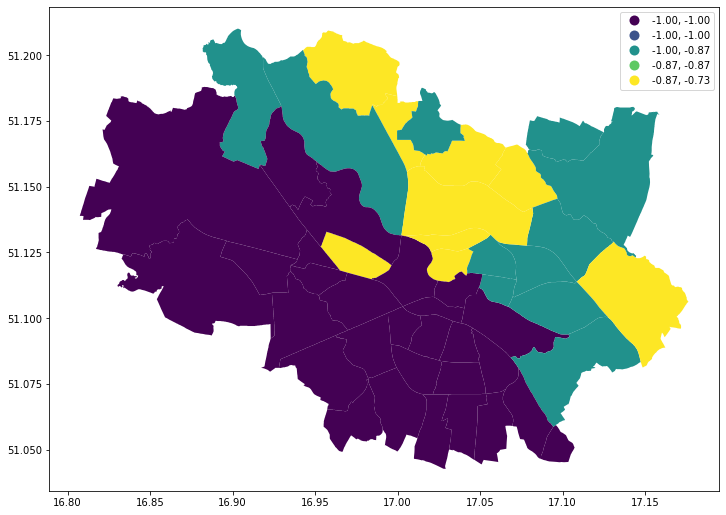

In [24]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
gdf.plot(column='kendall', scheme='Quantiles', k=5, cmap=None, legend=True, ax=ax)

Na powyższym wykresie widoczna jest korelacja czasowa jakości powietrza i postępów programu ,,Zmień Piec'' w obrębię każdej dzielnicy. Przede wszystkim, już patrząc na samą skalę wykresu, widać bardzo silną korelację negatywną pomiędzy tymi czynnikami - postęp akcji zmień piec jest wyraźnie powiązany ze spadkiem zanieczyszczeń powietrza.

Dodatkowego komentarza wymaga natomiast wysoka wartość korelacji na południu Wrocławia - jest to związane z faktem, że w poprzednich latach stacje z południa raportowały zdecydowanie największe zanieczyszczenia, co uległo wyraźnej poprawie na przestrzeni lat. Także na południu Wrocławia faktycznie nastąpiła największa poprawa jakości powietrza (stąd też tak silna korelacja z programem), ale może to również wynikać z tego, że na południu po prostu było najwięcej do poprawy.